In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
# The code was removed by Watson Studio for sharing.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [43]:
df=pd.get_dummies(df,columns=['Country','Status'])

In [44]:
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,1


In [45]:
cols=df.columns
cols

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ',
       ...
       'Country_Uruguay', 'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Venezuela (Bolivarian Republic of)', 'Country_Viet Nam',
       'Country_Yemen', 'Country_Zambia', 'Country_Zimbabwe',
       'Status_Developed', 'Status_Developing'],
      dtype='object', length=215)

In [46]:
df.fillna(method='bfill',inplace=True)
df.isnull().any().sum()

0

In [47]:
X=df.drop(columns=['Life expectancy '])
y=df['Life expectancy ']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [51]:
#training the model
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
y_pred=model.predict(X_test)

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

96.19067086467933

In [54]:
model.score(X_test,y_test)

0.9619067086467933

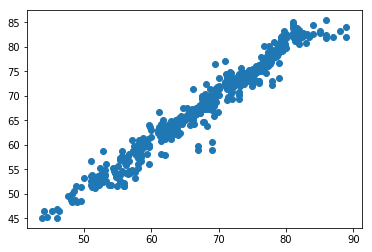

In [55]:
plt.scatter(y_test,y_pred)

In [56]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.225374149659864
MSE: 3.3032809523809505
RMSE: 1.8174930405316414


In [57]:
!pip install watson-machine-learning-client

In [58]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [68]:
wml_credentials={
  "apikey": "dL0bHFy8b7GRGmUfVvr72hMR4E1d0U4zrdQTIdOrKo-E",
  "instance_id": "16374ddf-e1cf-4674-a505-c88033b57c24",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [69]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [70]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Mahitha", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "kothapallymahitha@gmail.com", 
               client.repository.ModelMetaNames.NAME: "LifeExpectancyPrediction"}

In [71]:
model_artifact =client.repository.store_model(model, meta_props=model_props)

In [72]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [73]:
published_model_uid

'a550d4ab-e58c-4a97-a4eb-6b894c073eb6'

In [65]:
deployment = client.deployments.create(published_model_uid, name="LifeExpectancyPrediction")



#######################################################################################

Synchronous deployment creation for uid: '0d81c805-951b-4188-8423-c1f8dbdb2542' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='3083d832-5962-4ebc-996a-b55847fa01fd'
------------------------------------------------------------------------------------------------




In [66]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [67]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/16374ddf-e1cf-4674-a505-c88033b57c24/deployments/3083d832-5962-4ebc-996a-b55847fa01fd/online'